## More feature extraction

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

[nltk_data] Downloading package stopwords to C:\Users\Prashant
[nltk_data]     Dahiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv("data/df_fe_without_preprocessing_train.csv")
df.fillna('')

Unnamed: 0      id    qid1    qid2  \
0                0       0       1       2   
1                1       1       3       4   
2                2       2       5       6   
3                3       3       7       8   
4                4       4       9      10   
...            ...     ...     ...     ...   
404285      404285  404285  433578  379845   
404286      404286  404286   18840  155606   
404287      404287  404287  537928  537929   
404288      404288  404288  537930  537931   
404289      404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287                                  What is one coin?   
404288  What is the approx annual cost of living while...   
404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  \
0       What is the step by step guide to invest in sh...             0   
1       What would happen if the Indian government sto...             0   
2       How can Internet speed be increased by hacking...             0   
3       Find the remainder when [math]23^{24}[/math] i...             0   
4                 Which fish would survive in salt water?             0   
...                                                   ...           ...   
404285  How many keywords are there in PERL Programmin...             0   
404286         Is it true that there is life after death?             1   
404287                                  What's this coin?             0   
404288  I am having little hairfall problem but I want...             0   
404289      What is it like to have sex with your cousin?             0   

        freq_qid1  freq_qid2  q1_len  q2_len  q1_n_words  q2_n_words  \
0               1          1      66      57          14          12   
1               4          1      51      88           8          13   
2               1          1      73      59          14          10   
3               1          1      50      65          11           9   
4               3          1      76      39          13           7   
...           ...        ...     ...     ...         ...         ...   
404285          2          2      85      79          14          13   
404286         12          1      41      42           8           9   
404287          1          1      17      17           4           3   
404288          1          1      94     127          17          25   
404289          1          1      37      45           8          10   

        word_Common  word_Total  word_share   freq_q1+q2  freq_q1-q2  \
0              10.0        23.0     0.434783           2           0   
1               4.0        20.0     0.200000           5           3   
2               4.0        24.0     0.166667           2           0   
3               0.0        19.0     0.000000           2           0   
4               2.0        20.0     0.100000           4           2   
...             ...         ...          ...         ...         ...   
404285         11.0        25.0     0.440000           4           0   
404286          5.0        16.0     0.312500          13          11   
404287          1.0         7.0     0.142857           2           0   
404288          1.0        40.0     0.025000           2           0   
404289          8.0        18.0     0.444444           2           0   

                                          processed_ques2  \
0                      step st

### Preprocessing of text

- Text preprocessing is a crucial step in natural language processing (NLP) and machine learning tasks involving textual data. It involves cleaning and transforming raw text data into a format that is suitable for analysis or model training.

1) Lowercasing: Converting all text to lowercase to ensure consistent processing.

2) Removing Punctuation: Eliminating punctuation marks from the text.

3) Removing Stopwords: Removing common words (stopwords) like "the," "and," "is," etc., that don't carry much meaning.

4) Stemming: Reducing words to their root form (e.g., "running" becomes "run").

In [12]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in stop_words])
    
    # Stemming
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    text = ' '.join([stemmer.stem(word) for word in words])
    
    return text



In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Prashant
[nltk_data]     Dahiya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
df['processed_ques2'] = df['question2'].apply(preprocess_text)
df['processed_ques1'] = df['question1'].apply(preprocess_text)

print(df.head())


   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   
2  How can Internet speed be increased by hacking...             0          1   
3  Find the remainder when [math]23^{24}[/math] i...             0          1   
4            Which fish would survive in salt water?             0          3   

   freq_qid2  q1_len  q2_len  q1_n_words  q2_n_words  word_Common  word_Total  \

In [20]:
df.to_csv("data/df_fe_without_preprocessing_train.csv")

In [2]:
df=pd.read_csv("data/df_fe_without_preprocessing_train.csv")

## Advanced Feature Extraction (NLP and Fuzzy Features) 

Advanced feature extraction in natural language processing (NLP) involves deriving meaningful and informative features from text data that go beyond simple word frequencies. Additionally, fuzzy features can be used to capture similarity or distance measures between different text elements. Here are some advanced feature extraction techniques you can consider:

1. **TF-IDF (Term Frequency-Inverse Document Frequency)**:
   TF-IDF is a technique that assigns weights to words based on their frequency in a document relative to their frequency in the entire corpus. It helps to highlight words that are important in a specific document while downplaying common words. Libraries like scikit-learn provide built-in tools for TF-IDF feature extraction.

2. **Word Embeddings (Word2Vec, GloVe, FastText)**:
   Word embeddings represent words as dense vector representations in a continuous vector space. Word2Vec, GloVe, and FastText are popular techniques for generating word embeddings. These embeddings capture semantic relationships between words and are often used as features in machine learning models.

3. **Document Embeddings (Doc2Vec, Sentence-BERT)**:
   Similar to word embeddings, document embeddings represent entire documents as dense vectors. Doc2Vec and Sentence-BERT are techniques used to generate document embeddings. These embeddings capture the semantic meaning of the entire document.

4. **Part-of-Speech (POS) Tagging**:
   POS tagging assigns a part-of-speech tag (noun, verb, adjective, etc.) to each word in a sentence. These tags can be used as features to capture grammatical and syntactic information.

5. **Named Entity Recognition (NER)**:
   NER identifies and categorizes entities such as names of people, organizations, locations, dates, etc., in text. Extracting these entities as features can provide information about the content of the text.

6. **Sentiment Analysis Features**:
   Sentiment analysis can provide features related to the sentiment (positive, negative, neutral) expressed in the text. This could be in the form of sentiment scores or binary sentiment labels.

7. **Topic Modeling Features**:
   Techniques like Latent Dirichlet Allocation (LDA) can identify topics in a collection of documents. The distribution of topics in a document can be used as features.

8. **Fuzzy Features**:
   Fuzzy matching and similarity measures can be used to capture the similarity or distance between text elements. Levenshtein distance, Jaccard similarity, cosine similarity, and edit distance are examples of measures that can quantify similarity.

9. **N-grams**:
   N-grams are sequences of contiguous words in a text. They capture local context and can be used to extract features related to word sequences.

10. **Dependency Parsing**:
    Dependency parsing analyzes the grammatical structure of sentences by identifying relationships between words. These relationships can provide features related to syntax.

11. **Word Frequency Features**:
    Beyond raw word counts, you can consider features based on word frequency distributions, such as Zipf's law, which relates word frequency to rank.

feature extraction is often combined with data preprocessing, such as text cleaning and normalization, to ensure the quality of the features.



Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min length of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max length of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min length of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max length of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min length of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max length of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>
- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [16]:
def get_token_features(q1,q2):
    token_features = [0.0]*10
    SAFE_DIV = 0.0001 # to avoid division by zero
    # split ques into tokens
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    STOP_WORDS = stopwords.words("english")
    
    # get non-stopwords
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
    
    # get stopwords 
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # common non-stopwords
    common_word_count=len(q1_words.intersection(q2_words))
    
    # common stopwords
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
    # common tokens
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# longest common substring
def lscsubstring_ratio(a,b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

df["processed_ques1"]=df["processed_ques1"].fillna("")
df["processed_ques2"]=df["processed_ques2"].fillna("")

token_features = df.apply(lambda x: get_token_features(x["processed_ques1"], x["processed_ques2"]), axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))
df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
df["mean_len"]      = list(map(lambda x: x[9], token_features))

In [21]:
# df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["processed_ques1"], x["processed_ques2"]), axis=1)    
# df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["processed_ques1"], x["processed_ques2"]), axis=1)
# df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["processed_ques1"], x["processed_ques2"]), axis=1)
# df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["processed_ques1"], x["processed_ques2"]), axis=1)
df["longest_substr_ratio"]  = df.apply(lambda x: lscsubstring_ratio(x["processed_ques1"], x["processed_ques2"]), axis=1)

In [22]:
df.columns

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate', 'freq_qid1', 'freq_qid2', 'q1_len', 'q2_len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share ',
       'freq_q1+q2', 'freq_q1-q2', 'processed_ques2', 'processed_ques1',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [23]:
df.to_csv("data/nlp_features_train.csv", index=False)

## Analysis of extracted features 

### Plotting Word clouds

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [2]:
df=pd.read_csv("data/nlp_features_train.csv")

In [4]:
df_duplicate=df[df["is_duplicate"]==1]
df_notduplicate=df[df["is_duplicate"]==0]

# Converte 2d array of q1 and q2 and flatten the array
p = np.dstack([df_duplicate["processed_ques1"], df_duplicate["processed_ques2"]]).flatten()
n=np.dstack([df_notduplicate["processed_ques1"],df_notduplicate["processed_ques2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))


Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [5]:
print(p[:10])

['astrolog capricorn sun cap moon cap risingwhat say'
 'im tripl capricorn sun moon ascend capricorn say' 'good geologist'
 'great geologist' 'read find youtub comment' 'see youtub comment'
 'make physic easi learn' 'make physic easi learn'
 'first sexual experi like' 'first sexual experi']


In [7]:
#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s',encoding='utf-8')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s',encoding='utf-8')

In [9]:
from os import path

d = path.dirname('.')

# Read the text files using 'utf-8' encoding
textp_w = open(path.join(d, 'train_p.txt'), encoding='utf-8').read()
textn_w = open(path.join(d, 'train_n.txt'), encoding='utf-8').read()


Word Cloud for Duplicate Question pairs


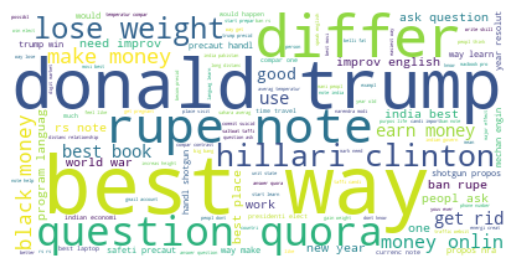

In [10]:
STOP_WORDS = stopwords.words("english")
wc=WordCloud(background_color="white",max_words=len(textp_w),stopwords=STOP_WORDS)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();

Word Cloud for Non Duplicate Question pairs


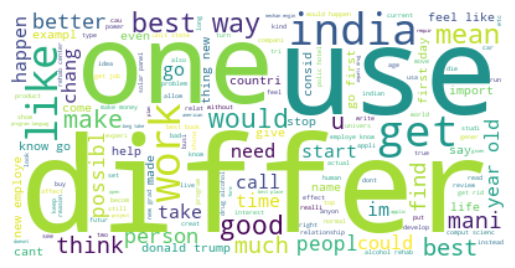

In [11]:
wc=WordCloud(background_color="white",max_words=len(textn_w),stopwords=STOP_WORDS)
wc.generate(textn_w)
print ("Word Cloud for Non Duplicate Question pairs")
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();

<h4>  Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

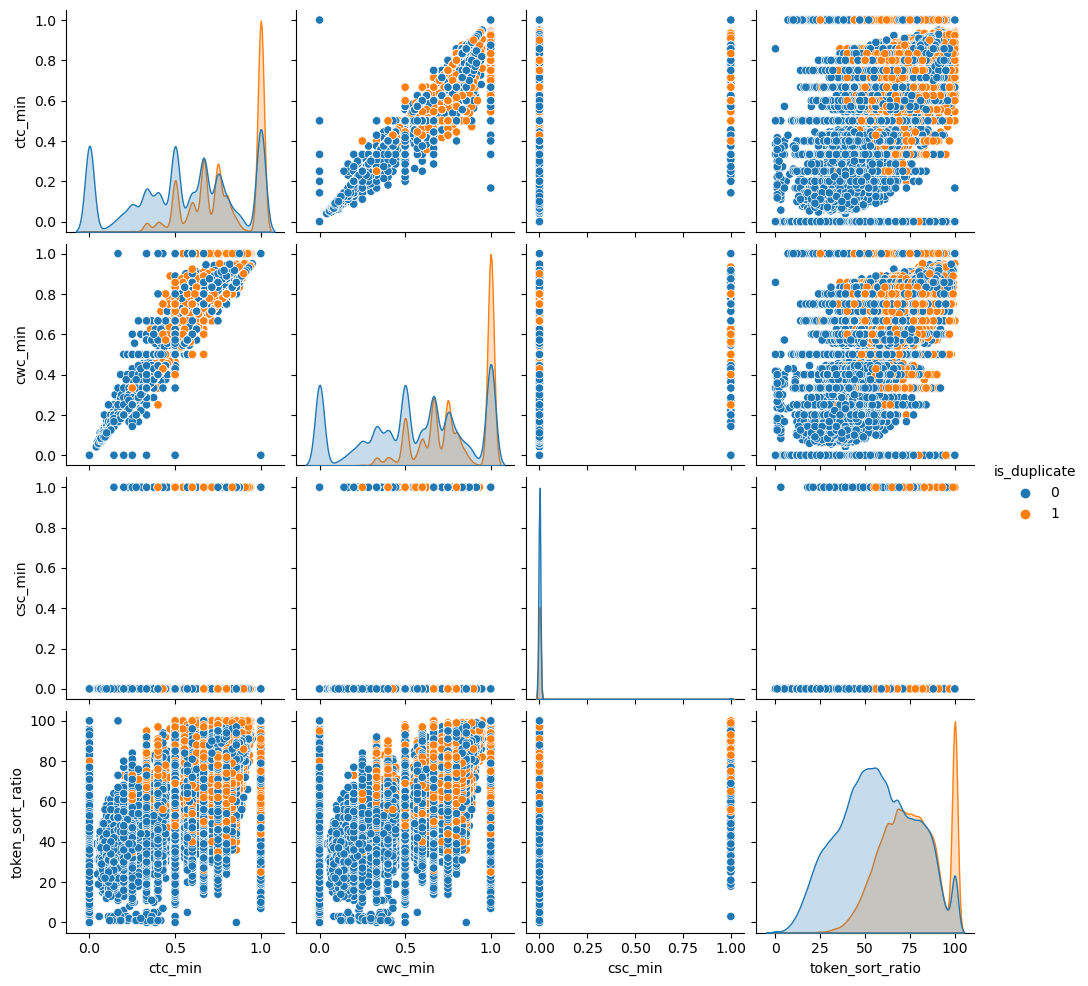

In [13]:
n=df.shape[0]
sns.pairplot(df[ ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio','is_duplicate'] ][0:n],hue='is_duplicate')
plt.show()

In [3]:
df.head(1)

Unnamed: 0  id  qid1  qid2  \
0           0   0     1     2   

                                           question1  \
0  What is the step by step guide to invest in sh...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   

   freq_qid2  q1_len  ...   ctc_max  last_word_eq  first_word_eq  \
0          1      66  ...  0.714276           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           1.0       6.5              100                92          92   

  fuzz_partial_ratio longest_substr_ratio  
0                100             0.971429  

[1 rows x 35 columns]

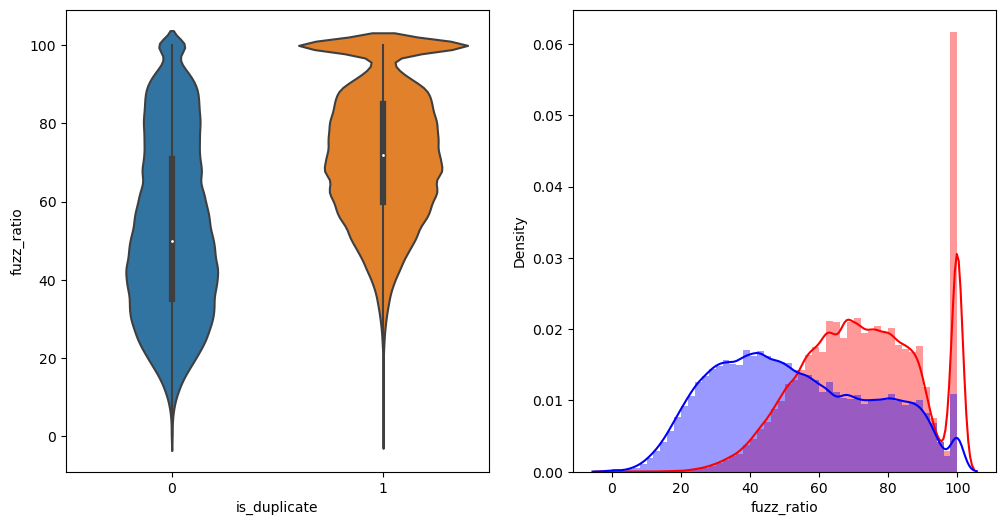

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='fuzz_ratio',data=df[0:],)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['fuzz_ratio'][0:],label="0",color='blue')
plt.show();

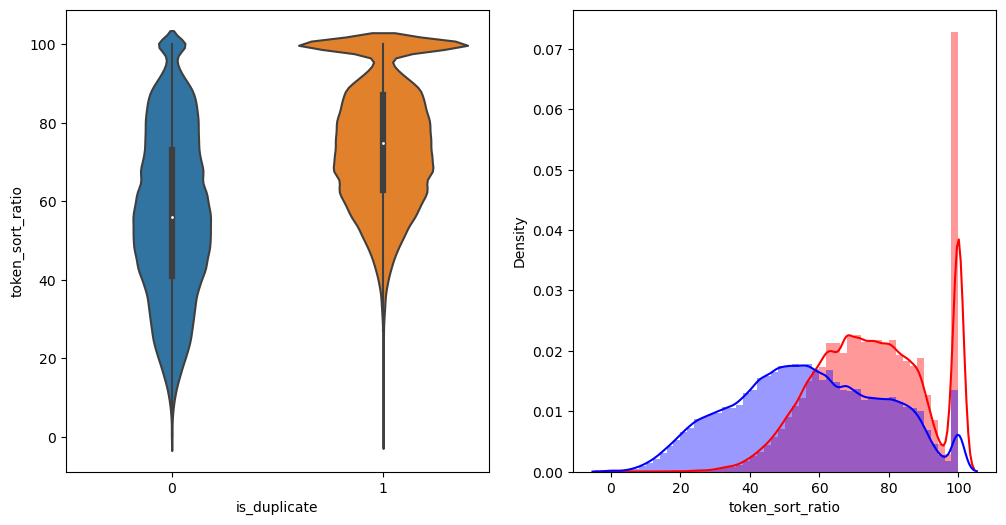

In [5]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='token_sort_ratio',data=df[0:],)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['token_sort_ratio'][0:],label="0",color='blue')
plt.show();

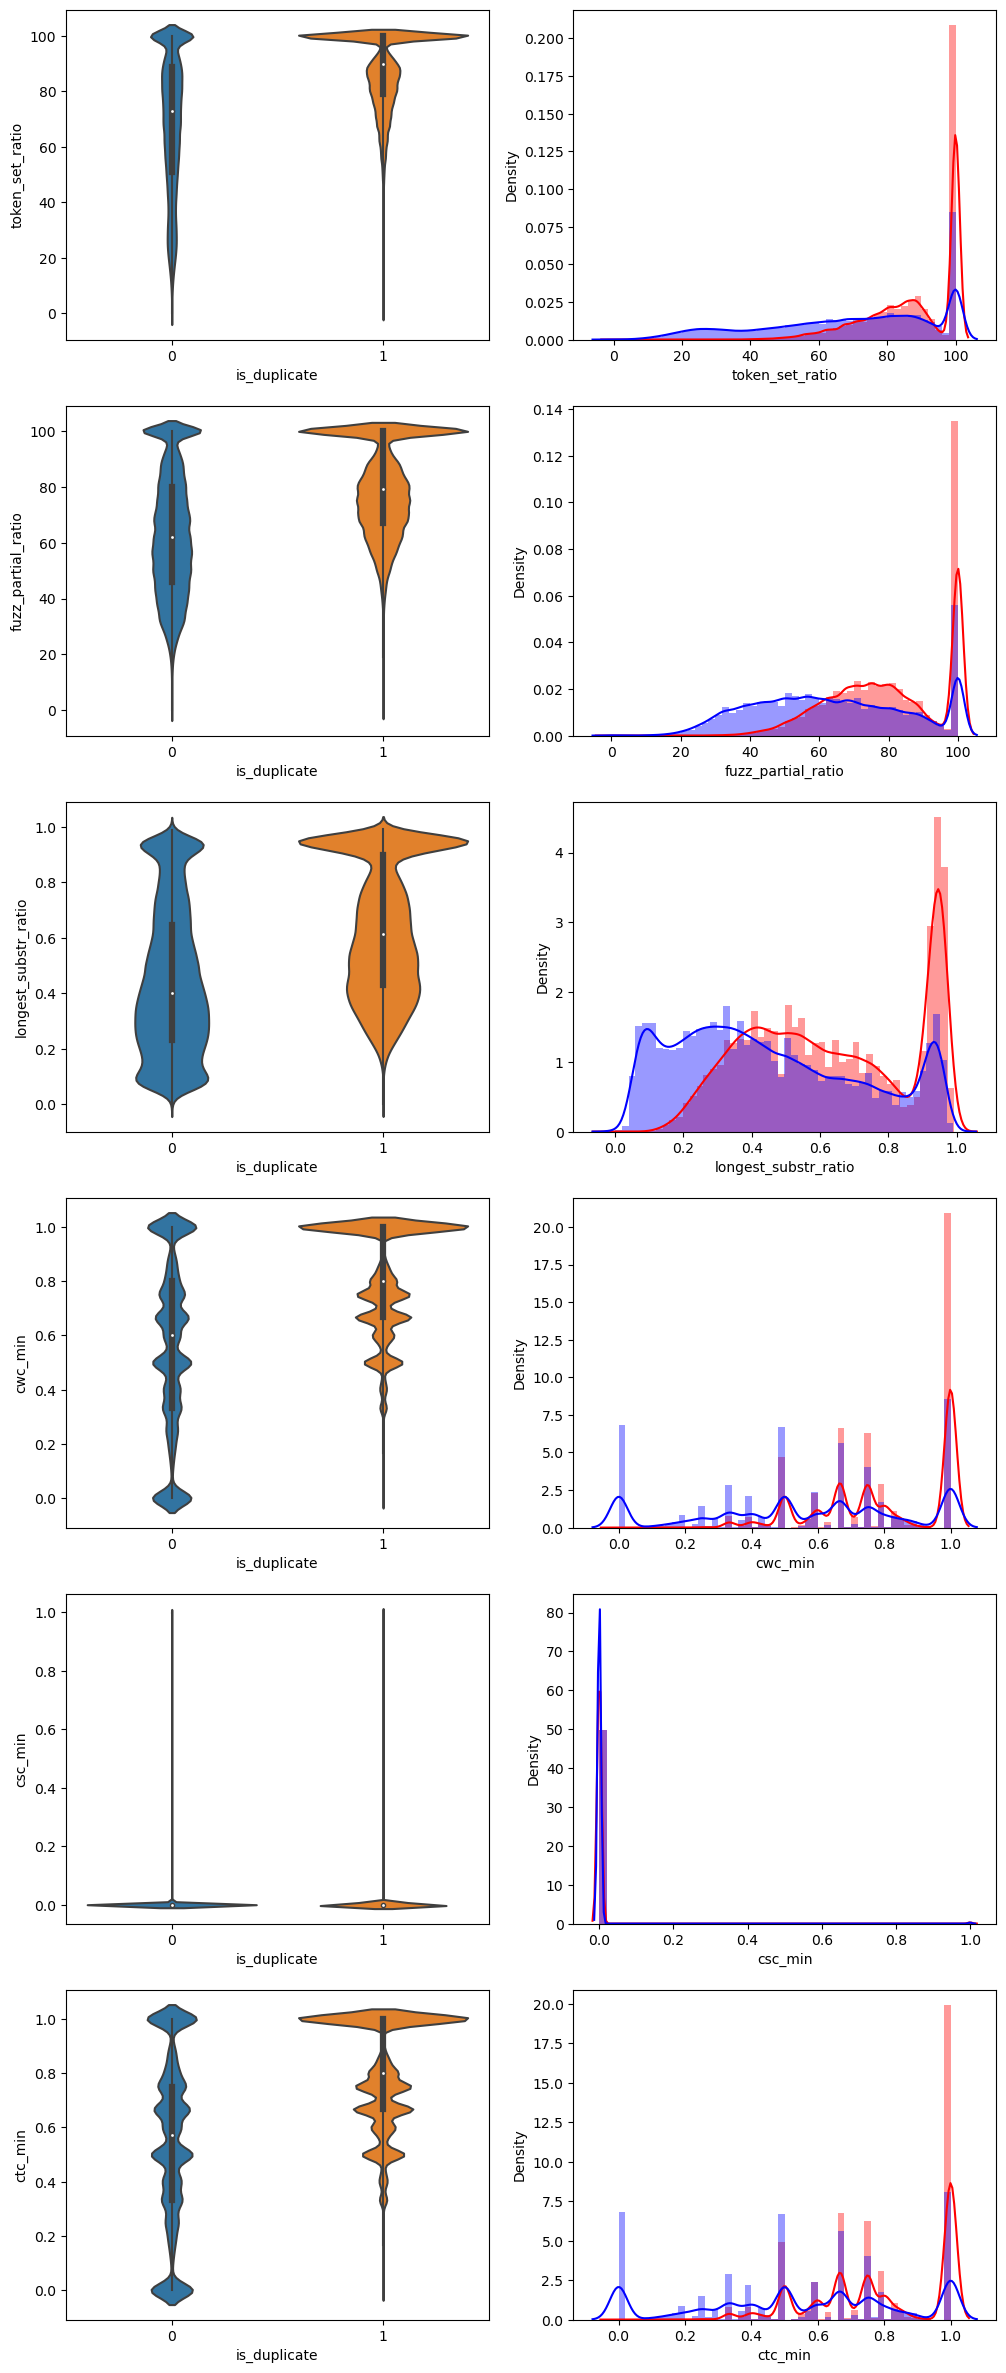

In [7]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.violinplot(x='is_duplicate',y='token_set_ratio',data=df[0:],)

plt.subplot(6,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_set_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['token_set_ratio'][0:],label="0",color='blue')
#
plt.subplot(6,2,3)
sns.violinplot(x='is_duplicate',y='fuzz_partial_ratio',data=df[0:],)

plt.subplot(6,2,4)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_partial_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['fuzz_partial_ratio'][0:],label="0",color='blue')
##

plt.subplot(6,2,5)
sns.violinplot(x='is_duplicate',y='longest_substr_ratio',data=df[0:],)

plt.subplot(6,2,6)
sns.distplot(df[df['is_duplicate'] == 1.0]['longest_substr_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['longest_substr_ratio'][0:],label="0",color='blue')
###


plt.subplot(6,2,7)
sns.violinplot(x='is_duplicate',y='cwc_min',data=df[0:],)

plt.subplot(6,2,8)
sns.distplot(df[df['is_duplicate'] == 1.0]['cwc_min'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['cwc_min'][0:],label="0",color='blue')
####


plt.subplot(6,2,9)
sns.violinplot(x='is_duplicate',y='csc_min',data=df[0:],)

plt.subplot(6,2,10)
sns.distplot(df[df['is_duplicate'] == 1.0]['csc_min'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['csc_min'][0:],label="0",color='blue')
#####

plt.subplot(6,2,11)
sns.violinplot(x='is_duplicate',y='ctc_min',data=df[0:],)

plt.subplot(6,2,12)
sns.distplot(df[df['is_duplicate'] == 1.0]['ctc_min'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['ctc_min'][0:],label="0",color='blue')

plt.show();

In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler


In [12]:
df_sampled=df[:5000]
X=MinMaxScaler().fit_transform(df_sampled[['cwc_min', 'cwc_max', 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y=df_sampled["is_duplicate"].values

In [13]:
tsne2d=TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.011s...
[t-SNE] Computed neighbors for 5000 samples in 0.380s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.017074
[t-SNE] Computed conditional probabilities in 0.177s
[t-SNE] Iteration 50: error = 84.6184235, gradient norm = 0.0978876 (50 iterations in 1.224s)
[t-SNE] Iteration 100: error = 69.1410522, gradient norm = 0.0156786 (50 iterations in 0.939s)
[t-SNE] Iteration 150: error = 66.5604095, gradient norm = 0.0098898 (50 iterations in 0.979s)
[t-SNE] Iteration 200: error = 65.3852844, gradient norm = 0.0068739 (50 iterations in 0.961s)
[t-SNE] Iteration 250: error = 64.7644196, gradient norm = 0.0056182

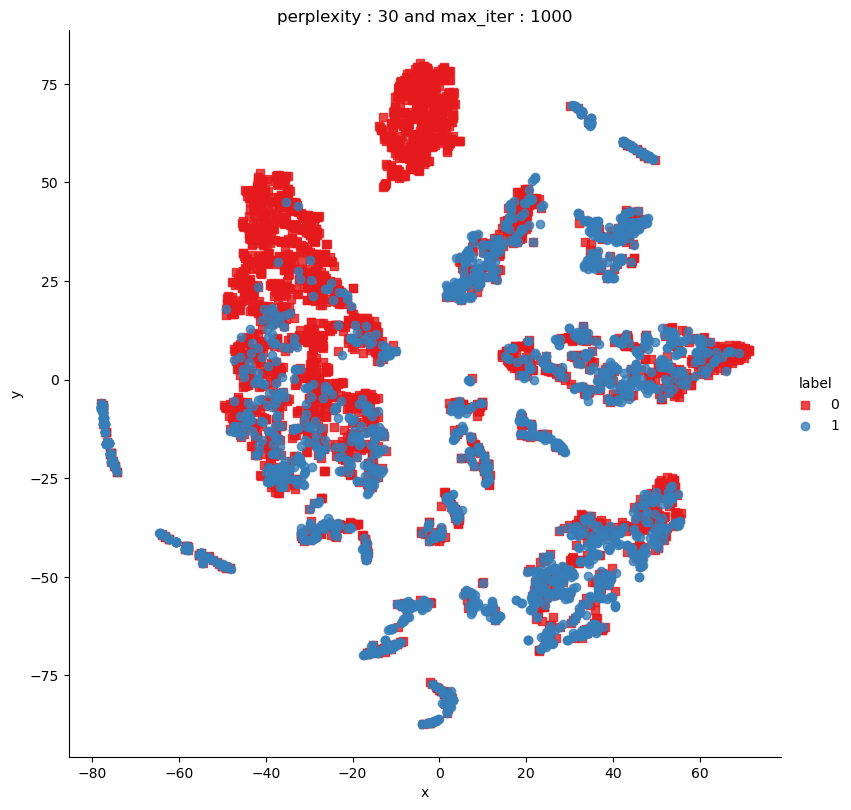

In [14]:
df1 = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df1, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [15]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.011s...
[t-SNE] Computed neighbors for 5000 samples in 0.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.017074
[t-SNE] Computed conditional probabilities in 0.158s
[t-SNE] Iteration 50: error = 85.1296844, gradient norm = 0.1211373 (50 iterations in 2.127s)
[t-SNE] Iteration 100: error = 67.4447403, gradient norm = 0.0083689 (50 iterations in 1.559s)
[t-SNE] Iteration 150: error = 65.4103012, gradient norm = 0.0041697 (50 iterations in 1.555s)
[t-SNE] Iteration 200: error = 64.6415482, gradient norm = 0.0027957 (50 iterations in 1.713s)
[t-SNE] Iteration 250: error = 64.2263947, gradient norm = 0.0021538

In [16]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

# without preprocessing(stemming)

In [4]:
df=pd.read_csv("data/train.csv")

In [5]:
df.head(1)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0

In [9]:
df=df.fillna(" ")
df["freq_qid1"]=df.groupby(by="qid1")["qid1"].transform('count')
df["freq_qid2"]=df.groupby("qid2")["qid2"].transform('count')
df["q1_len"]=df["question1"].str.len()
df["q2_len"]=df["question2"].str.len()
df["q1_n_words"]=df["question1"].apply(lambda row: len(row.split(" ")))
df["q2_n_words"]=df["question2"].apply(lambda row: len(row.split(" ")))


def normalized_common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row["question2"].split(" ")))
    return 1.0*len(w1&w2)
df["word_Common"]=df.apply(normalized_common_words,axis=1) 

def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))

df['word_Total'] = df.apply(normalized_word_Total, axis=1)
df["word_share "]=df["word_Common"]/ df["word_Total"]
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

In [10]:
def get_token_features(q1,q2):
    token_features = [0.0]*10
    SAFE_DIV = 0.0001 # to avoid division by zero
    # split ques into tokens
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    STOP_WORDS = stopwords.words("english")
    
    # get non-stopwords
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
    
    # get stopwords 
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # common non-stopwords
    common_word_count=len(q1_words.intersection(q2_words))
    
    # common stopwords
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
    # common tokens
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# longest common substring
def lscsubstring_ratio(a,b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

# df["processed_ques1"]=df["processed_ques1"].fillna("")
# df["processed_ques2"]=df["processed_ques2"].fillna("")

token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))
df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
df["mean_len"]      = list(map(lambda x: x[9], token_features))

In [12]:
df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
print("done....")
df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
print("done....")
df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
print("done....")
df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
print("done....")
df["longest_substr_ratio"]  = df.apply(lambda x: lscsubstring_ratio(x["question1"], x["question2"]), axis=1)

done....
done....
done....
done....


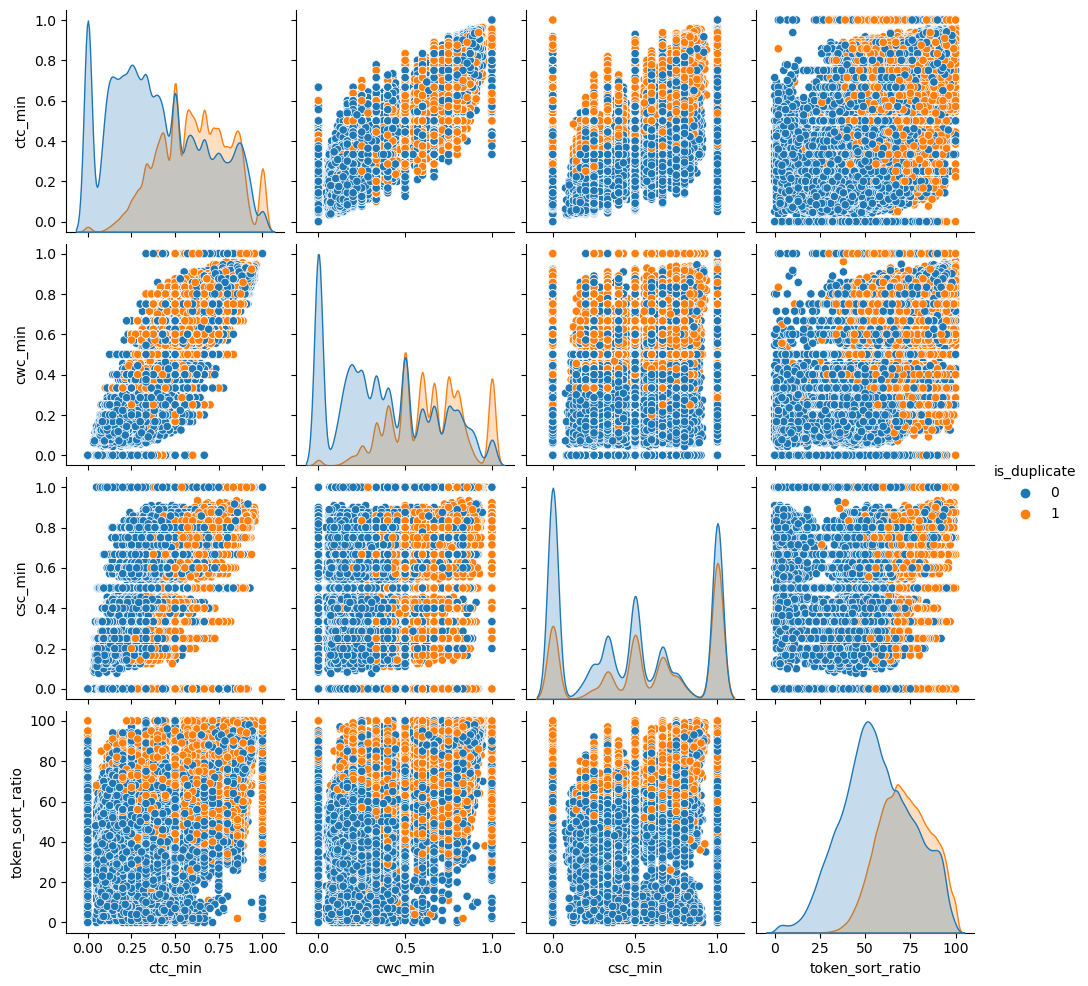

In [13]:
n=df.shape[0]
sns.pairplot(df[ ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio','is_duplicate'] ][0:n],hue='is_duplicate')
plt.show()

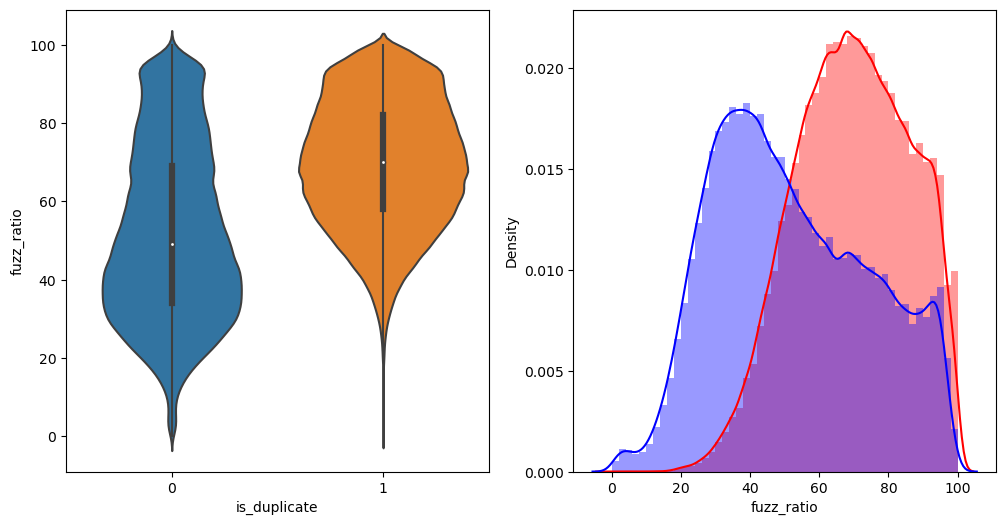

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='fuzz_ratio',data=df[0:],)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['fuzz_ratio'][0:],label="0",color='blue')
plt.show();

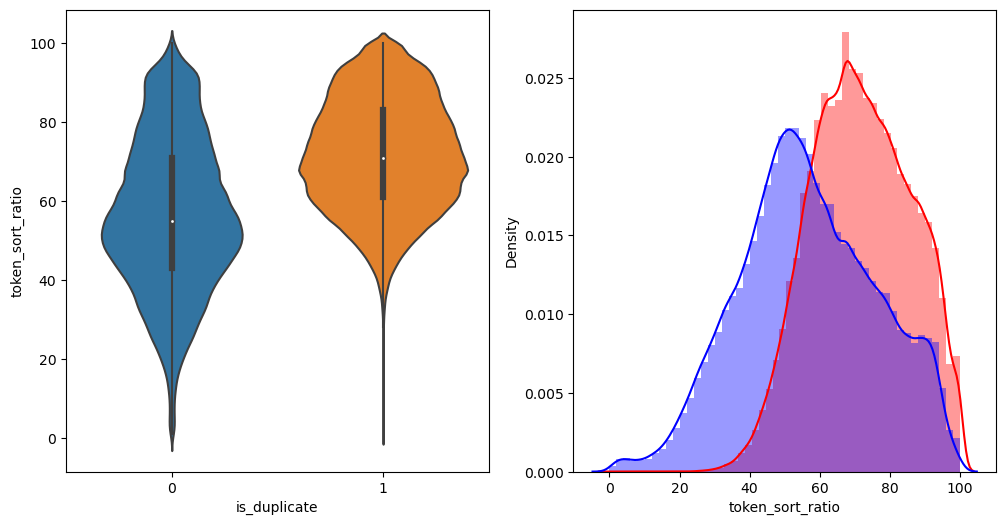

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='token_sort_ratio',data=df[0:],)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate']==0.0]['token_sort_ratio'][0:],label="0",color='blue')
plt.show();

In [17]:
df_sampled=df[:5000]
X = MinMaxScaler().fit_transform(df_sampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df_sampled['is_duplicate'].values

In [18]:
tsne2d=TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.055s...
[t-SNE] Computed neighbors for 5000 samples in 0.621s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.124499
[t-SNE] Computed conditional probabilities in 0.381s
[t-SNE] Iteration 50: error = 85.0789871, gradient norm = 0.0797783 (50 iterations in 1.310s)
[t-SNE] Iteration 100: error = 69.5183640, gradient norm = 0.0141620 (50 iterations in 1.166s)
[t-SNE] Iteration 150: error = 67.2025528, gradient norm = 0.0082452 (50 iterations in 1.013s)
[t-SNE] Iteration 200: error = 66.2372208, gradient norm = 0.0060551 (50 iterations in 1.280s)
[t-SNE] Iteration 250: error = 65.7120895, gradient norm = 0.0050234

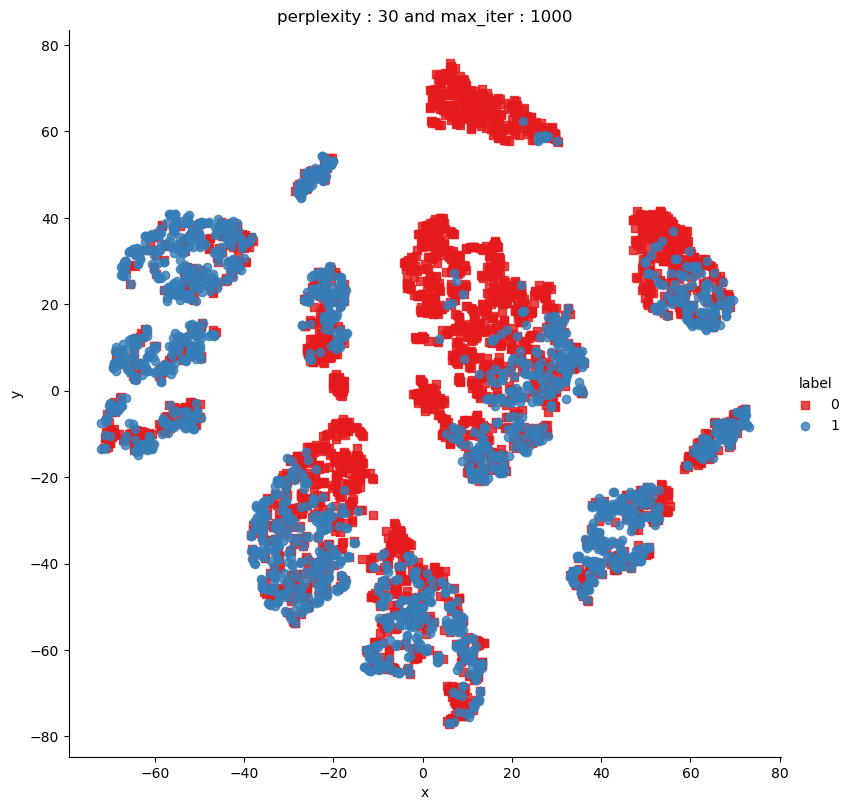

In [19]:
df1 = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df1, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [20]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.012s...
[t-SNE] Computed neighbors for 5000 samples in 0.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.124499
[t-SNE] Computed conditional probabilities in 0.145s
[t-SNE] Iteration 50: error = 86.5133743, gradient norm = 0.0813582 (50 iterations in 2.532s)
[t-SNE] Iteration 100: error = 68.1168976, gradient norm = 0.0080837 (50 iterations in 2.404s)
[t-SNE] Iteration 150: error = 66.2141418, gradient norm = 0.0040028 (50 iterations in 2.101s)
[t-SNE] Iteration 200: error = 65.5169449, gradient norm = 0.0026111 (50 iterations in 1.573s)
[t-SNE] Iteration 250: error = 65.1318512, gradient norm = 0.0020537

In [21]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')